In [108]:
%matplotlib inline

import pandas as pd
import numpy as np
from fbprophet import Prophet

In [109]:
df = pd.read_csv('piwik-export-main-metrics_2015-07-31_2017-05-26.csv',
                 sep=',', parse_dates=['Date'], usecols=('Date', 'Visits'))

df.head()

,Date,Visits
0,2015-08-02,1
1,2015-08-03,3
2,2015-08-04,6
3,2015-08-05,3
4,2015-08-06,10


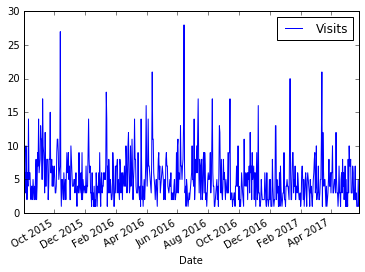

In [110]:
df.set_index('Date').plot()

In [111]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2015-08-02,1
1,2015-08-03,3
2,2015-08-04,6
3,2015-08-05,3
4,2015-08-06,10


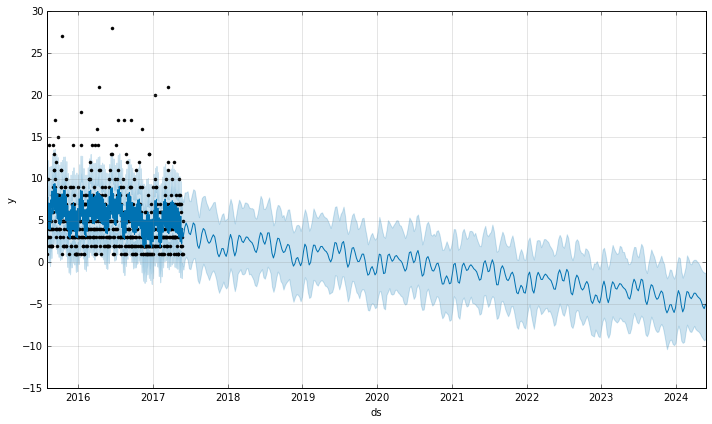

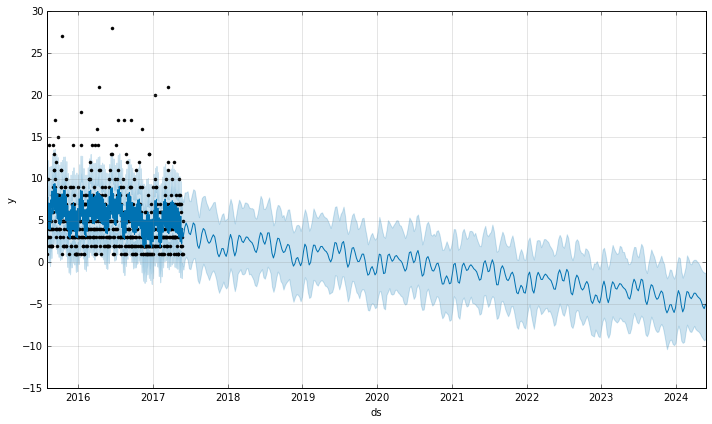

In [112]:
prophet = Prophet()
prophet.fit(df)

future = prophet.make_future_dataframe(periods=365, freq='W')
forecast = prophet.predict(future)

prophet.plot(forecast)

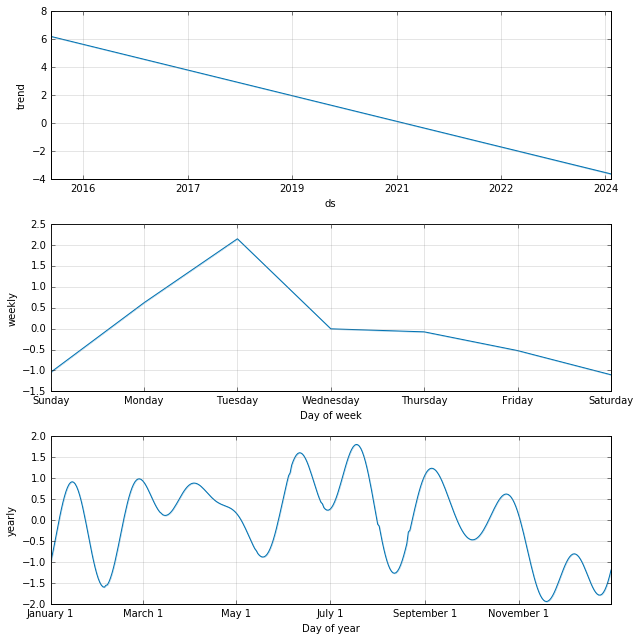

In [113]:
prophet.plot_components(forecast);

In [114]:
import datetime
from dateutil import rrule

gtalug_meeting_days = list(rrule.rrule(freq=rrule.MONTHLY, dtstart=datetime.date(2015, 8, 2),
                                       until=datetime.date(2017, 5, 26), byweekday=(rrule.TU), bysetpos=2))

meetings = pd.DataFrame({
    'holiday': 'meeting',
    'ds': pd.to_datetime(gtalug_meeting_days),
    'lower_window': 0,
    'upper_window': 5,
})

meetings.tail()

,ds,holiday,lower_window,upper_window
17,2017-01-10,meeting,0,5
18,2017-02-14,meeting,0,5
19,2017-03-14,meeting,0,5
20,2017-04-11,meeting,0,5
21,2017-05-09,meeting,0,5


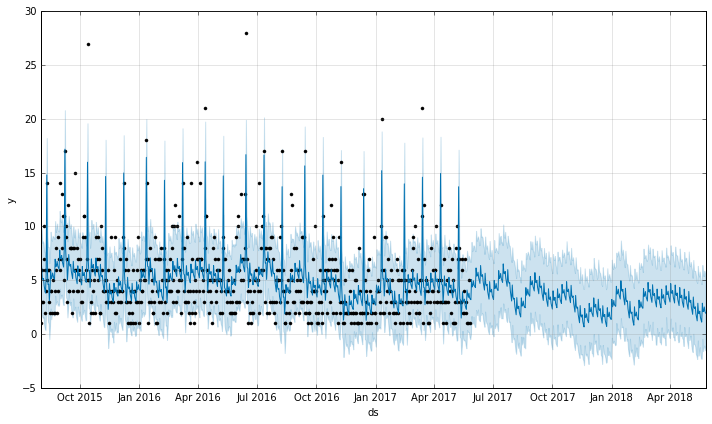

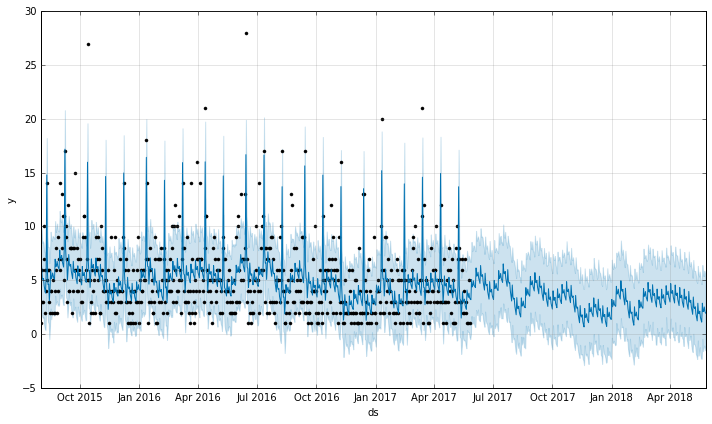

In [115]:
prophet = Prophet(holidays=meetings).fit(df)

future = prophet.make_future_dataframe(periods=365)
forecast = prophet.predict(future)

prophet.plot(forecast)

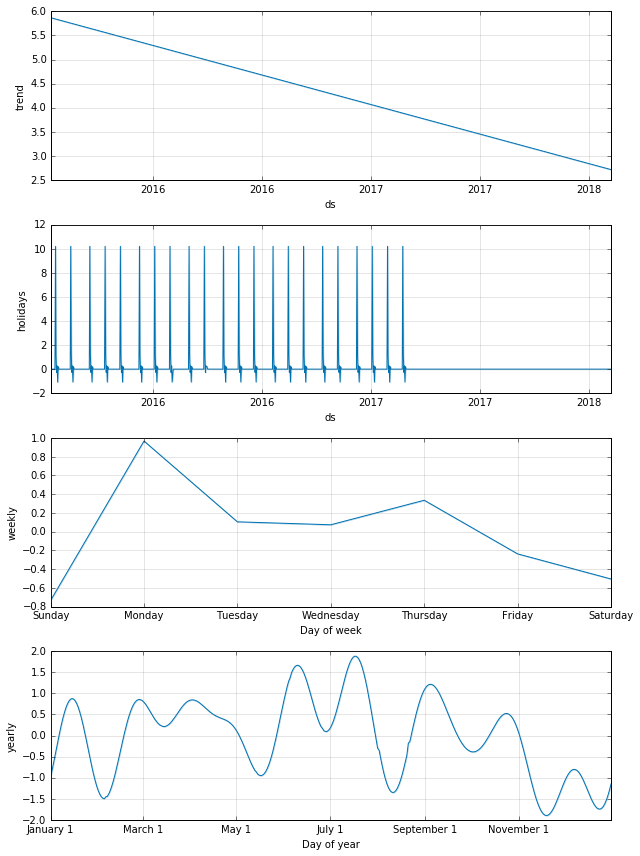

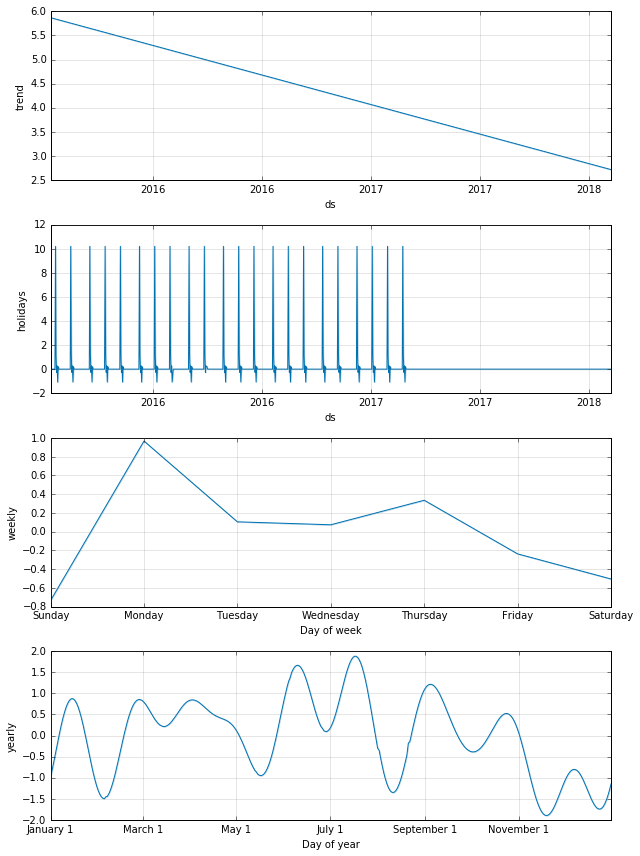

In [116]:
prophet.plot_components(forecast)